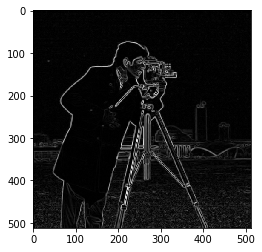

In [4]:
from skimage import data,filters
import matplotlib.pyplot as plt
img = data.camera()

#sobel算子 检测边缘
edges = filters.sobel(img)
plt.imshow(edges,plt.cm.gray)

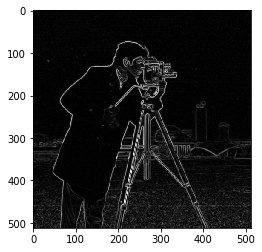

In [5]:
edges1 = filters.roberts(img)
plt.imshow(edges1,plt.cm.gray)

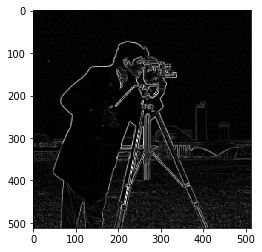

In [6]:
edges3 = filters.scharr(img)
plt.imshow(edges3,plt.cm.gray)

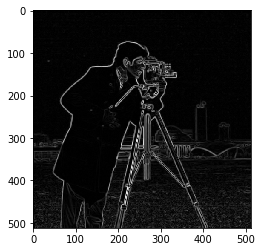

In [7]:
edges4 = filters.prewitt(img)
plt.imshow(edges4,plt.cm.gray)

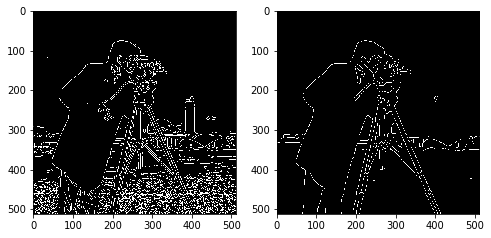

In [8]:
from skimage import data,filters,feature
import matplotlib.pyplot as plt
img = data.camera()
edges1 = feature.canny(img)   #sigma=1
edges2 = feature.canny(img,sigma=3)   #sigma=3

plt.figure('canny',figsize=(8,8))
plt.subplot(121)
plt.imshow(edges1,plt.cm.gray)  

plt.subplot(122)
plt.imshow(edges2,plt.cm.gray)

plt.show()

In [9]:
#gabor滤波
filt_real, filt_imag = filters.gabor_filter(img,frequency=0.6)   

plt.figure('gabor',figsize=(8,8))

plt.subplot(121)
plt.title('filt_real')
plt.imshow(filt_real,plt.cm.gray)  

plt.subplot(122)
plt.title('filt-imag')
plt.imshow(filt_imag,plt.cm.gray)

plt.show()

AttributeError: module 'skimage.filters' has no attribute 'gabor_filter'

In [10]:
edges1 = filters.gaussian_filter(img,sigma=0.4)   #sigma=0.4
edges2 = filters.gaussian_filter(img,sigma=5)   #sigma=5

plt.figure('gaussian',figsize=(8,8))
plt.subplot(121)
plt.imshow(edges1,plt.cm.gray)  

plt.subplot(122)
plt.imshow(edges2,plt.cm.gray)

plt.show()

AttributeError: module 'skimage.filters' has no attribute 'gaussian_filter'

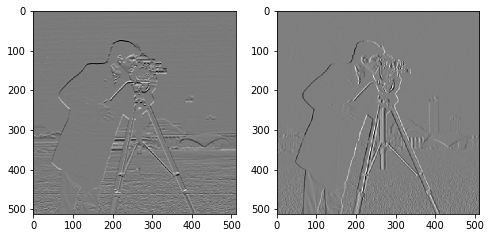

In [12]:
from skimage import data,filters
import matplotlib.pyplot as plt
img = data.camera()
edges1 = filters.sobel_h(img)  
edges2 = filters.sobel_v(img) 

plt.figure('sobel_v_h',figsize=(8,8))

plt.subplot(121)
plt.imshow(edges1,plt.cm.gray)  

plt.subplot(122)
plt.imshow(edges2,plt.cm.gray)

plt.show()

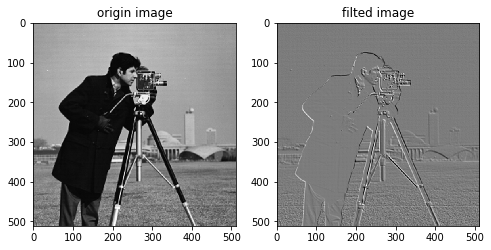

In [13]:
from skimage import data,filters
import matplotlib.pyplot as plt
img =data.camera()
dst =filters.roberts_neg_diag(img) 

plt.figure('filters',figsize=(8,8))
plt.subplot(121)
plt.title('origin image')
plt.imshow(img,plt.cm.gray)

plt.subplot(122)
plt.title('filted image')
plt.imshow(dst,plt.cm.gray)

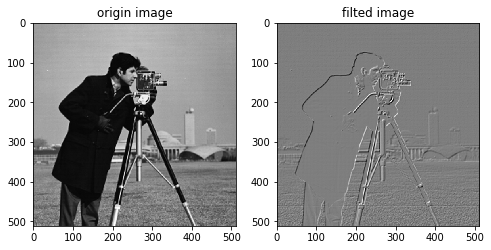

In [14]:
from skimage import data,filters
import matplotlib.pyplot as plt
img =data.camera()
dst =filters.roberts_pos_diag(img) 

plt.figure('filters',figsize=(8,8))
plt.subplot(121)
plt.title('origin image')
plt.imshow(img,plt.cm.gray)

plt.subplot(122)
plt.title('filted image')
plt.imshow(dst,plt.cm.gray)

(1099, 1280, 3) uint8


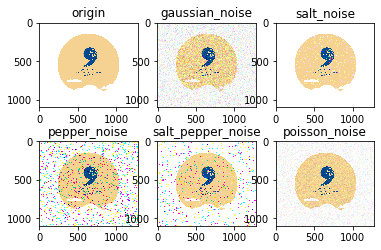

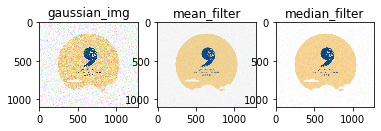

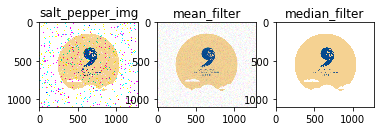

In [15]:
import cv2
import numpy as np
from skimage.util import random_noise
from matplotlib import pyplot as plt
import skimage.io
from skimage import img_as_ubyte
"""
Created on 2018.07.02
@author: vincent
 
 
"""
 
 
def salt(img, n):
    for k in range(n):
        i = int(np.random.random()*img.shape[1])
        j = int(np.random.random()*img.shape[0])
        if img.ndim==2:
            img[j.i] = 0;
        elif img.ndim==3:
            img[j,i,0] = 255
            img[j,i,1] = 255
            img[j,i,2] = 255
 
 
def pepper(img, n):
    for k in range(n):
        i = int(np.random.random()*img.shape[1])
        j = int(np.random.random()*img.shape[0])
        if img.ndim==2:
            img[j.i] = 0;
        elif img.ndim==3:
            img[j,i,0] = 0
            img[j,i,1] = 0
            img[j,i,2] = 0
 
 
 
if __name__ == "__main__":
 
    img = skimage.io.imread('/home/whf/111.png')
     
    sigma = 0.1
    gaussian_img = random_noise(img, var = sigma**2)
 
    salt_img = random_noise(img, mode = 'salt')
 
    pepper_img = random_noise(img, mode = 'pepper')
 
    salt_pepper_img = random_noise(img, mode = 's&p')
 
    poisson_img = random_noise(img, mode='poisson')
 
    images = [img, gaussian_img, salt_img, pepper_img, salt_pepper_img, poisson_img]
    titles = ['origin', 'gaussian_noise', 'salt_noise', 'pepper_noise', 'salt_pepper_noise', 'poisson_noise']
    for i in range(6):
        plt.subplot(2,3, i+1)
        plt.title(titles[i])
        plt.imshow(images[i])
     
 
    # denoise on gaussian noise
    plt.figure()
    #gaussian_img = cv2.cvtColor(gaussian_img.astype(np.uint8), cv2.COLOR_RGB2BGR)
    #gaussian_img = gaussian_img[:,:,::-1]
 
    gaussian_img = img_as_ubyte(gaussian_img)
    print(gaussian_img.shape, gaussian_img.dtype)
    mean_filter = cv2.blur(gaussian_img, (5,5))
    median_filter = cv2.medianBlur(gaussian_img, 5)
    images = [gaussian_img, mean_filter, median_filter]
    titles = ['gaussian_img', 'mean_filter', 'median_filter']
    for i in range(3):
        plt.subplot(1,3,i+1)
        plt.title(titles[i])
        plt.imshow(images[i])
 
 
 
    # denoise on salt and pepper noise
    plt.figure()
    salt_pepper_img = img_as_ubyte(salt_pepper_img)
    #salt_pepper_img = cv2.cvtColor(salt_pepper_img.astype(np.uint8), cv2.COLOR_RGB2BGR)
 
    mean_filter = cv2.blur(salt_pepper_img, (5,5))
    median_filter = cv2.medianBlur(salt_pepper_img, 5)
    images = [salt_pepper_img, mean_filter, median_filter]
    titles = ['salt_pepper_img', 'mean_filter', 'median_filter']
    for i in range(3):
        plt.subplot(1,3,i+1)
        plt.title(titles[i])
        plt.imshow(images[i])
 
    plt.show()
    plt.close('all')

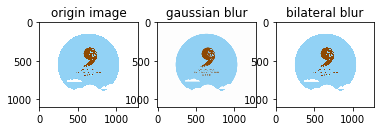

In [16]:
gaussian_img = cv2.GaussianBlur(img, (5,5), 75)
 
 
bilateral_img = cv2.bilateralFilter(img, 5, 75, 75)
 
images = [img, gaussian_img, bilateral_img]
titles = ['origin image', 'gaussian blur', 'bilateral blur']
 
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
plt.show()
 
plt.close('all')